In [22]:
import pandas as pd
import numpy as np
import arviz as az

In [23]:
df_india = pd.read_excel(r'alldatasets.xlsx',sheet_name='India')

In [24]:
df_india.head()

,childid,country,height,stunting_2cat,EDUYRS2,z_score,timeschool,agegapr1,momeduyrsr1,chsexr1,agemonr1,hhsizer1,wi_newr1,job_cat,pvt_sector,earn,earn_usd
0,IN011004,India,164.000000,1.0,10.0,0.402029,10.0,13.0,0.0,1,95,4,0.458333,5,1,6000,98.376785
1,IN011006,India,158.199997,0.0,10.0,0.143023,30.0,12.0,0.0,0,95,4,0.097222,5,1,32000,524.676147
2,IN011012,India,157.199997,0.0,16.5,0.276244,10.0,5.0,10.0,0,101,6,0.722222,2,1,0,0.000000
3,IN011013,India,169.500000,0.0,11.0,0.252178,5.0,NaN,12.0,1,98,2,0.814815,5,1,9000,147.565170
4,IN011014,India,162.199997,0.0,7.0,0.394253,NaN,7.0,16.5,0,100,4,0.796296,2,1,72000,1180.521362


In [25]:
df_india.columns

Index(['childid', 'country', 'height', 'stunting_2cat', 'EDUYRS2', 'z_score',
       'timeschool', 'agegapr1', 'momeduyrsr1', 'chsexr1', 'agemonr1',
       'hhsizer1', 'wi_newr1', 'job_cat', 'pvt_sector', 'earn', 'earn_usd'],
      dtype='object')

In [26]:
from scipy import stats
import scipy.stats as stats

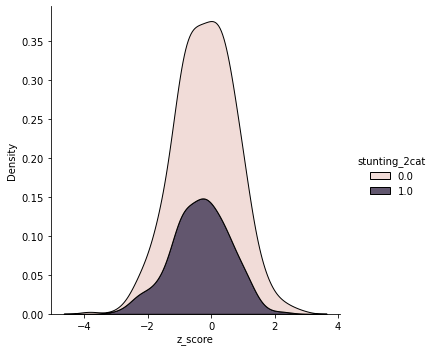

In [27]:
import seaborn as sns
sns.displot(df_india, x="z_score", hue="stunting_2cat", kind="kde", multiple="stack")

# Bayesian

In [28]:
Y = df_india[['z_score']]
X = df_india[['stunting_2cat']]

In [29]:
formula = 'z_score ~ ' + ' + '.join(['%s' % variable for variable in X.columns[0:]])
formula

'z_score ~ stunting_2cat'

In [30]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
import pymc3 as pm

# Context for the model
with pm.Model() as normal_model:
    
    my_priors= {
        'Intercept': pm.Normal.dist(mu=0, sigma=10.),
        'stunting_2cat': pm.Normal.dist(mu=1, sigma=1)        
    }
    
    
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = df_india, priors=my_priors)
    
    # Perform Markov Chain Monte Carlo sampling letting PyMC3 choose the algorithm
    normal_trace = pm.sample(draws=3000, chains = 2, tune = 4000,target_accept=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, stunting_2cat, Intercept]


Sampling 2 chains for 4_000 tune and 3_000 draw iterations (8_000 + 6_000 draws total) took 23 seconds.


In [32]:
az.summary(normal_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,-0.121,0.053,-0.222,-0.024,0.001,0.001,3269.0,3074.0,3271.0,3518.0,1.0
stunting_2cat,-0.209,0.088,-0.374,-0.045,0.001,0.001,3695.0,3674.0,3698.0,3333.0,1.0
sd,0.954,0.029,0.899,1.008,0.000,0.000,4343.0,4343.0,4349.0,3863.0,1.0


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'stunting_2cat'}>,
        <AxesSubplot:title={'center':'stunting_2cat'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

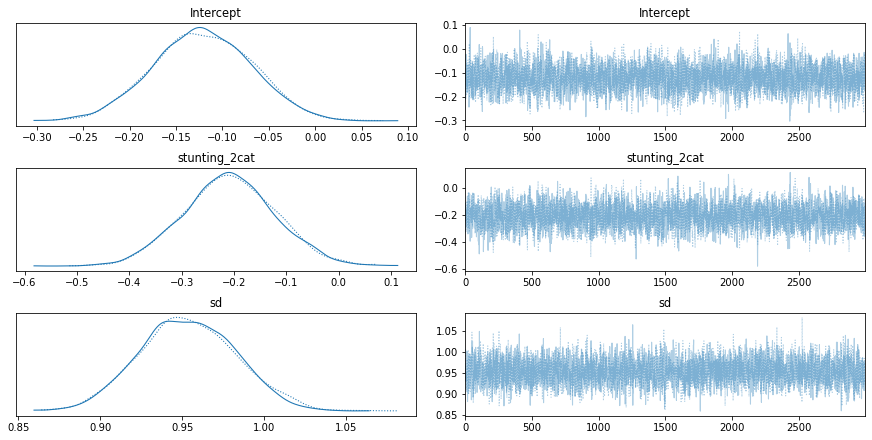

In [33]:
az.plot_trace(normal_trace)

In [34]:
Y = df_india['z_score']
X = df_india[['stunting_2cat', 'agegapr1', 'momeduyrsr1', 'chsexr1', 'agemonr1','wi_newr1',
       'hhsizer1']]

In [35]:
formula = 'z_score ~ ' + ' + '.join(['%s' % variable for variable in X.columns[0:]])
formula

'z_score ~ stunting_2cat + agegapr1 + momeduyrsr1 + chsexr1 + agemonr1 + wi_newr1 + hhsizer1'

In [36]:
import warnings
warnings.filterwarnings("ignore")

In [37]:
import pymc3 as pm

# Context for the model
with pm.Model() as normal_model:
    
    my_priors= {
        'Intercept': pm.Normal.dist(mu=0, sigma=10),
        'stunting_2cat': pm.Normal.dist(mu=1, sigma=1),
        'agegapr1': pm.Normal.dist(mu=1, sigma=1),
        'momeduyrsr1': pm.Normal.dist(mu=1, sigma=1),
        'chsexr1': pm.Normal.dist(mu=1, sigma=1),
        'agemonr1': pm.Normal.dist(mu=1, sigma=1),
        'wi_newr1': pm.Normal.dist(mu=1, sigma=1),
        'hhsizer1': pm.Normal.dist(mu=1, sigma=1)
    }
    
    
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = df_india, priors=my_priors)
    
    # Perform Markov Chain Monte Carlo sampling letting PyMC3 choose the algorithm
    normal_trace = pm.sample(draws=5000, chains = 2, tune = 1000,target_accept=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, hhsizer1, wi_newr1, agemonr1, chsexr1, momeduyrsr1, agegapr1, stunting_2cat, Intercept]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 144 seconds.


In [38]:
az.summary(normal_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,-0.093,0.918,-1.814,1.611,0.012,0.009,5956.0,5505.0,5985.0,6640.0,1.0
stunting_2cat,-0.123,0.079,-0.273,0.022,0.001,0.001,11497.0,9581.0,11493.0,7296.0,1.0
agegapr1,-0.004,0.012,-0.027,0.018,0.000,0.000,10461.0,5457.0,10478.0,7542.0,1.0
momeduyrsr1,0.091,0.014,0.065,0.118,0.000,0.000,9830.0,9788.0,9829.0,7361.0,1.0
chsexr1,0.462,0.075,0.319,0.603,0.001,0.000,11642.0,11455.0,11652.0,6949.0,1.0
agemonr1,-0.006,0.009,-0.024,0.012,0.000,0.000,6134.0,5339.0,6171.0,6727.0,1.0
wi_newr1,0.927,0.216,0.510,1.323,0.002,0.002,10067.0,9898.0,10063.0,7071.0,1.0
hhsizer1,-0.028,0.018,-0.061,0.007,0.000,0.000,12670.0,10135.0,12660.0,7312.0,1.0
sd,0.824,0.026,0.777,0.873,0.000,0.000,10100.0,9975.0,10324.0,7362.0,1.0


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'stunting_2cat'}>,
        <AxesSubplot:title={'center':'stunting_2cat'}>],
       [<AxesSubplot:title={'center':'agegapr1'}>,
        <AxesSubplot:title={'center':'agegapr1'}>],
       [<AxesSubplot:title={'center':'momeduyrsr1'}>,
        <AxesSubplot:title={'center':'momeduyrsr1'}>],
       [<AxesSubplot:title={'center':'chsexr1'}>,
        <AxesSubplot:title={'center':'chsexr1'}>],
       [<AxesSubplot:title={'center':'agemonr1'}>,
        <AxesSubplot:title={'center':'agemonr1'}>],
       [<AxesSubplot:title={'center':'wi_newr1'}>,
        <AxesSubplot:title={'center':'wi_newr1'}>],
       [<AxesSubplot:title={'center':'hhsizer1'}>,
        <AxesSubplot:title={'center':'hhsizer1'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

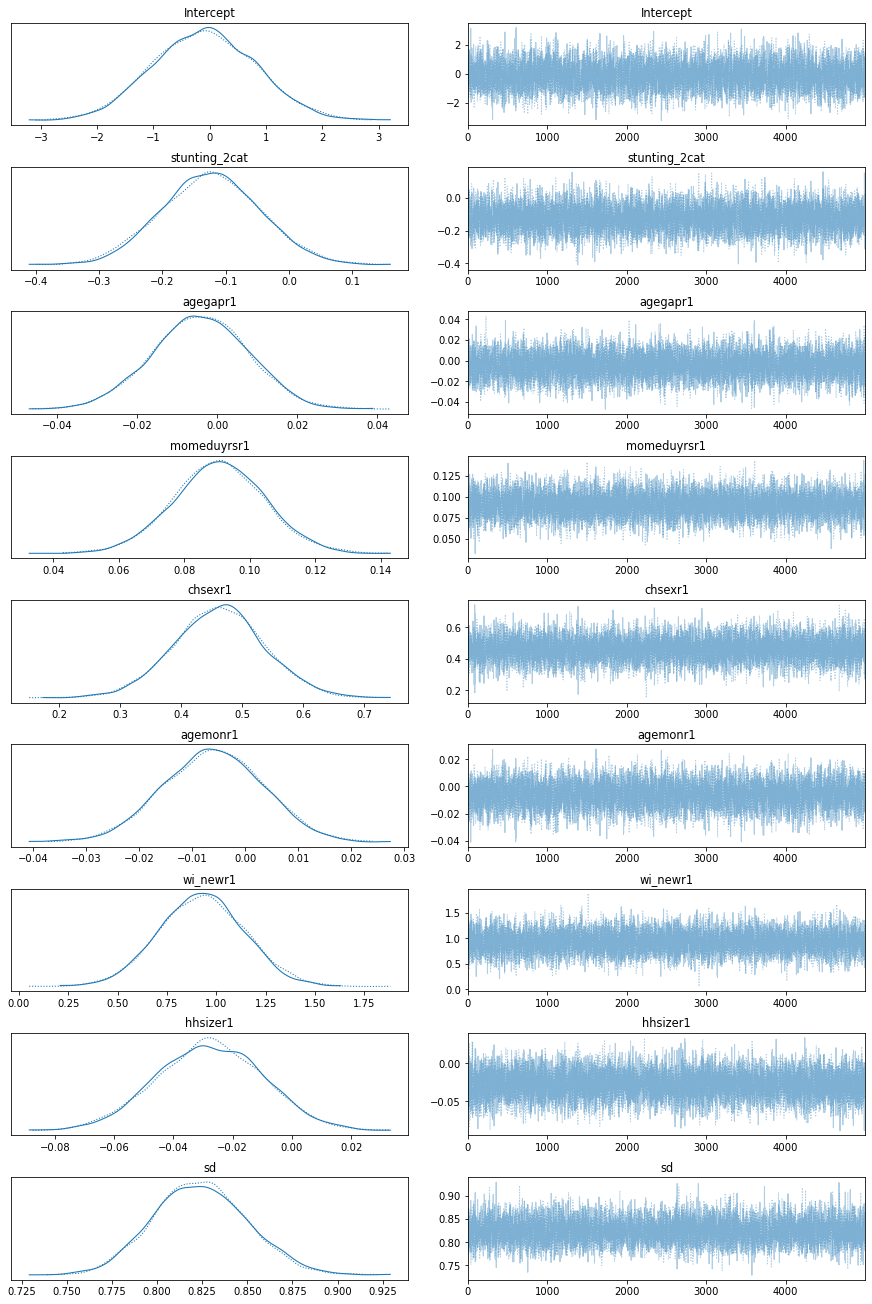

In [39]:
az.plot_trace(normal_trace)

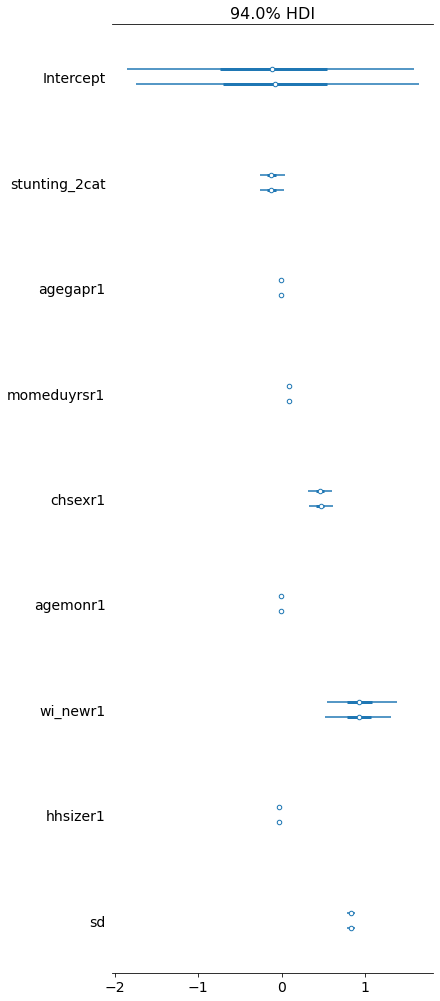

In [40]:
az.plot_forest(normal_trace);